# Pandas  : Python Data Analysis Library

<div><img style="float: left;margin-left : 70px" src='fig/pandas_logo.png' height="500" width="500"/>

# Pandas, a Data Analysis Library

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

GeoExtension : geopandas

# Webography

- Online Doc: https://pandas.pydata.org/
- CheatSheet : https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- Tutorials:
    - https://www.dataschool.io/easier-data-analysis-with-pandas/
    - https://www.dataschool.io/data-science-best-practices-with-pandas/
- Pandas PySciDataGre Talk : https://python.univ-grenoble-alpes.fr/working-session-librairie-pandas.html
- GeoPandas : http://geopandas.org/

Code using pandas usually starts with the import statement

In [1]:
import pandas as pd

Pandas 
- 2 data structures (Series, DataFrame) for data analysis
    
- multiple methods for convenient data filtering.

- toolkit utilities to perform input/output operations.
It can read data from a variety of formats such as CSV, TSV, MS Excel, etc.


Pandas has two main data structures for data storage

- Series
- DataFrame


In [2]:
## Series structure

import pandas as pd
import numpy as np

series1 = pd.Series([1,2,3,4])  
print(series1)  

print(series1.sum())

print(series1.mean())
print(series1.to_csv())

fruits = np.array(['kiwi','orange','mango','apple'])  
series2 = pd.Series(fruits)  
print(series2)



0    1
1    2
2    3
3    4
dtype: int64
10
2.5
0,1
1,2
2,3
3,4

0      kiwi
1    orange
2     mango
3     apple
dtype: object


/home/huderl/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if sys.path[0] == '':


# Dataframe

A dictionnary of series where keys are column name

<div><img style="float: left;margin-left : 70px" src='fig/dataframe_type.png' height="800" width="800"/>


## How to create a data frame ?


### From scratch


In [3]:
## DataFrame structure
import pandas as pd 
  
# Intialise data: dictionnary of lists. 
data = {'Name':['John', 'Paul', 'Debby', 'Laura'], 'Sex':['Male','Male','Female','Female'], 'Age':[20, 40, 19, 30]} 
  
# Create DataFrame 
df = pd.DataFrame(data)
print(df)

type(df.Age)

    Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30


pandas.core.series.Series

### From a file

In [4]:
import pandas as pd
df_person = pd.read_csv('files/person.txt', sep = ',', encoding="utf-8", header=0)
print(df_person)

    Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30


By default, a new index is created

If you want use a field-based index, you have to specify it in the `read_csv` function:

```python
df_person = pd.read_csv('files/person.txt', sep = ',', index_col='Name', encoding="utf-8", header=0)
```


## Basic commands

In [5]:
# display simple statistics
print(df_person.describe())

             Age
count   4.000000
mean   27.250000
std     9.844626
min    19.000000
25%    19.750000
50%    25.000000
75%    32.500000
max    40.000000


In [6]:
# display the dataframe columns
print(df_person.columns)

Index(['Name', 'Sex', 'Age'], dtype='object')


In [7]:
# query one column
print(df_person["Age"])

# another method to query one column
print(df_person.Age)

0    20
1    40
2    19
3    30
Name: Age, dtype: int64
0    20
1    40
2    19
3    30
Name: Age, dtype: int64


In [8]:
# query multiple columns
print(df_person[['Name','Age']])

    Name  Age
0   John   20
1   Paul   40
2  Debby   19
3  Laura   30


In [9]:
# display unique value of a column
print(df_person.Sex.unique())

['Male' 'Female']


In [10]:
# display the 5 first rows
print(df_person.head())

# display the 5 last rows
print(df_person.tail())

# display 2 first rows
print(df_person[:2])

# display by position number
print(df_person.iloc[2])


print(df_person.iloc[:])

    Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30
    Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30
   Name   Sex  Age
0  John  Male   20
1  Paul  Male   40
Name     Debby
Sex     Female
Age         19
Name: 2, dtype: object
    Name     Sex  Age
0   John    Male   20
1   Paul    Male   40
2  Debby  Female   19
3  Laura  Female   30


In [11]:
print(df_person.loc[2])

Name     Debby
Sex     Female
Age         19
Name: 2, dtype: object


In [12]:
# Basic operations on columns 
df_person.Age = df_person.Age + 2
print(df_person.Age)

0    22
1    42
2    21
3    32
Name: Age, dtype: int64


### Add a row

In [13]:
df_person = df_person.append({'Name':'Glenn', 'Sex':'Male', 'Age':10}, ignore_index=True)
df_person

Name     Sex  Age
0   John    Male   22
1   Paul    Male   42
2  Debby  Female   21
3  Laura  Female   32
4  Glenn    Male   10

### Add some rows

In [14]:
data = {'Name':['Marguerite', 'Annie', 'Stephen', 'Ava'], 'Sex':['Female','Female','Male','Female'], 'Age':[34, 23, 49, 22]} 

df_person = df_person.append(pd.DataFrame(data), ignore_index=True)
df_person

Name     Sex  Age
0        John    Male   22
1        Paul    Male   42
2       Debby  Female   21
3       Laura  Female   32
4       Glenn    Male   10
5  Marguerite  Female   34
6       Annie  Female   23
7     Stephen    Male   49
8         Ava  Female   22

### Add a column

In [15]:
df_person["Nationality"] = 'USA'
df_person

Name     Sex  Age Nationality
0        John    Male   22         USA
1        Paul    Male   42         USA
2       Debby  Female   21         USA
3       Laura  Female   32         USA
4       Glenn    Male   10         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
7     Stephen    Male   49         USA
8         Ava  Female   22         USA

## Basic statistics

In [16]:
type(df_person.Age)

pandas.core.series.Series

In [17]:
## Mean
print(df_person.Age.mean())

## Min and Max
print(df_person.Age.min())
print(df_person.Age.max())

print(df_person.Age.count())

28.333333333333332
10
49
9


## How to sort data ?

In [18]:
df_person_sorted = df_person.sort_values(['Age'], ascending=True)
print(df_person_sorted)

         Name     Sex  Age Nationality
4       Glenn    Male   10         USA
2       Debby  Female   21         USA
0        John    Male   22         USA
8         Ava  Female   22         USA
6       Annie  Female   23         USA
3       Laura  Female   32         USA
5  Marguerite  Female   34         USA
1        Paul    Male   42         USA
7     Stephen    Male   49         USA


## Selection

In [19]:
# selection with one criterion
print(df_person[df_person['Sex'] == 'Female'])
print("--------------------")
print(df_person[df_person['Age'] < 20])
print("--------------------")
# selection with 2 criteria
print(df_person[(df_person['Sex'] == 'Male') & (df_person['Age'] > 30)])

         Name     Sex  Age Nationality
2       Debby  Female   21         USA
3       Laura  Female   32         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
8         Ava  Female   22         USA
--------------------
    Name   Sex  Age Nationality
4  Glenn  Male   10         USA
--------------------
      Name   Sex  Age Nationality
1     Paul  Male   42         USA
7  Stephen  Male   49         USA


## Update data

In [20]:
# change one value by index
df_person.loc[7, "Name"] =  "Stephane"
print(df_person)

# change one value after a selection
df_person.loc[df_person["Name"] == 'Stephane', "Name"] = "Eric"
print(df_person)

         Name     Sex  Age Nationality
0        John    Male   22         USA
1        Paul    Male   42         USA
2       Debby  Female   21         USA
3       Laura  Female   32         USA
4       Glenn    Male   10         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
7    Stephane    Male   49         USA
8         Ava  Female   22         USA
         Name     Sex  Age Nationality
0        John    Male   22         USA
1        Paul    Male   42         USA
2       Debby  Female   21         USA
3       Laura  Female   32         USA
4       Glenn    Male   10         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
7        Eric    Male   49         USA
8         Ava  Female   22         USA


In [21]:
## Add a column
df_person["City"] = "City"
print(df_person)
## Delete a column
df_person = df_person.drop("City", axis=1)
print(df_person)

         Name     Sex  Age Nationality  City
0        John    Male   22         USA  City
1        Paul    Male   42         USA  City
2       Debby  Female   21         USA  City
3       Laura  Female   32         USA  City
4       Glenn    Male   10         USA  City
5  Marguerite  Female   34         USA  City
6       Annie  Female   23         USA  City
7        Eric    Male   49         USA  City
8         Ava  Female   22         USA  City
         Name     Sex  Age Nationality
0        John    Male   22         USA
1        Paul    Male   42         USA
2       Debby  Female   21         USA
3       Laura  Female   32         USA
4       Glenn    Male   10         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
7        Eric    Male   49         USA
8         Ava  Female   22         USA


## Concat

<div><img style="float: left;margin-left : 70px" src='fig/concat-example.png' height="600" width="600"/>

In [22]:
data = {'Name':['Benedicte', 'Bernard', 'Nicolas', 'Anne'], 'Sex':['Female','Male','Male','Female'], 'Age':[24, 34, 49, 42],'Nationality':['FR','FR','FR','FR']} 
df_person_fr = pd.DataFrame(data)
list_person = [df_person,df_person_fr]
result = pd.concat(list_person)

print(result)

         Name     Sex  Age Nationality
0        John    Male   22         USA
1        Paul    Male   42         USA
2       Debby  Female   21         USA
3       Laura  Female   32         USA
4       Glenn    Male   10         USA
5  Marguerite  Female   34         USA
6       Annie  Female   23         USA
7        Eric    Male   49         USA
8         Ava  Female   22         USA
0   Benedicte  Female   24          FR
1     Bernard    Male   34          FR
2     Nicolas    Male   49          FR
3        Anne  Female   42          FR


## Join

<div><img style="float: left;margin-left : 70px" src='fig/join-example.png' height="600" width="600"/>

In [23]:
import random


data = {'id_Address':[0, 1, 2, 3], 'Address':['gordon street', 'aqua boulevard', 'st georges street', '5th street'], 'City':['Boston', 'Chicago', 'Charlotte', 'San Francisco']} 
  
# Create DataFrame 
df_address = pd.DataFrame(data)
print(df_address)

df_person["id_Address"] = ""
nb_elements = df_person.Name.count()

cpt = 0
while(cpt < nb_elements):
    df_person.loc[cpt,"id_Address"] = random.randint(0, 3)
    cpt = cpt + 1
print(df_person)

result = pd.merge(df_person, df_address, how='left', on='id_Address')
print(result)

   id_Address            Address           City
0           0      gordon street         Boston
1           1     aqua boulevard        Chicago
2           2  st georges street      Charlotte
3           3         5th street  San Francisco
         Name     Sex  Age Nationality  id_Address
0        John    Male   22         USA           3
1        Paul    Male   42         USA           2
2       Debby  Female   21         USA           3
3       Laura  Female   32         USA           0
4       Glenn    Male   10         USA           3
5  Marguerite  Female   34         USA           0
6       Annie  Female   23         USA           0
7        Eric    Male   49         USA           3
8         Ava  Female   22         USA           1
         Name     Sex  Age Nationality  id_Address            Address  \
0        John    Male   22         USA           3         5th street   
1        Paul    Male   42         USA           2  st georges street   
2       Debby  Female   21     

## Group By

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

<div><img style="float: left;margin-left : 70px" src='fig/groupby-example.png' height="800" width="800"/>

In [24]:
print(df_person.groupby('Sex')['Sex'].count())
print(df_person.groupby('Sex')['Age'].mean())

Sex
Female    5
Male      4
Name: Sex, dtype: int64
Sex
Female    26.40
Male      30.75
Name: Age, dtype: float64


## Export data 

In [25]:
export_csv = df_person.to_csv(r'./files/export_person.csv', index=None, header=True) 

## Plot data

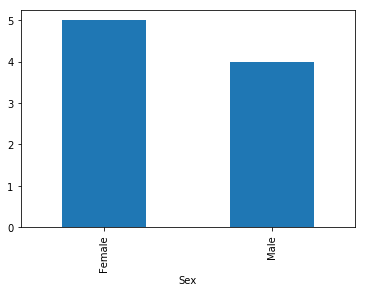

In [26]:
%matplotlib inline
df_person.groupby('Sex')['Sex'].count().plot.bar()

# DIY

## Goals : Compute light statistics on IMDB Movies files


The goal of this session is to end up with a script that computes some simple statistics from IMDB Movies files. The file was modified and reduced for this exercice 


Material

Data are in 2 files Directory named "files"

- name.tsv

This file contains the actors, the separation character is tabulation '\t'. The first line is the header.
```
nconst	primaryName	birthYear	deathYear	primaryProfession	knownForTitles
```

- title.tsv

This file contains the movies, the separation character is ','. The first line is the header.
```
tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
```

We want to
- load data from tsv file
- compute some basic statistics
- save data to tsv file

## Compute some basic statistics

1. Count the number of movies
2. Display the latest movies
3. Display the movies between 1939 and 1940
4. Diplay all the available titleType
5. Count the number of movies by titleType
6. Display Humphrey Bogart movies
7. Plot movie count by year between 1950 and 1960



## A possible correction

RangeIndex(start=0, stop=135460, step=1)
      tconst titleType                                   primaryTitle  \
0  tt0000009     movie                                     Miss Jerry   
1  tt0000020     short                                 The Derby 1895   
2  tt0000024     short                      Opening of the Kiel Canal   
3  tt0000025     short  The Oxford and Cambridge University Boat Race   
4  tt0000165     short                                Riña en un café   

                                   originalTitle  isAdult  startYear  endYear  \
0                                     Miss Jerry        0     1894.0      NaN   
1                                 The Derby 1895        0     1895.0      NaN   
2                      Opening of the Kiel Canal        0     1895.0      NaN   
3  The Oxford and Cambridge University Boat Race        0     1895.0      NaN   
4                                Riña en un café        0     1897.0      NaN   

   runtimeMinutes                

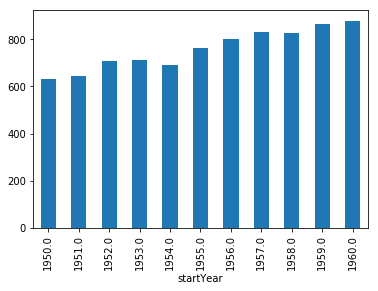

In [27]:
# load data
df_title = pd.read_csv('files/diy_12_pandas/title.tsv', sep = ',', encoding = "utf-8", header=0)
print(df_title.index)
print(df_title.head())
#1 
print(df_title.primaryTitle.count())
#2
print(df_title.sort_values(['startYear'], ascending=False).head())
#3
print(df_title[(df_title.startYear>=1939) & (df_title.startYear<=1940)]['originalTitle'])
#4
print(df_title["titleType"].unique())
#5
print(df_title.groupby("titleType")["titleType"].count())
#6
df_name = pd.read_csv('files/diy_12_pandas/name.tsv', sep = '\t', encoding = "utf-8", header=0)
author_titles = df_name.loc[df_name['primaryName']=='Humphrey Bogart']['knownForTitles']
print(df_title.loc[df_title['tconst'].isin(author_titles.tolist()[0].split(','))])
#7
df_title[(df_title['startYear']>=1950) &  (df_title['startYear']<=1960)].groupby("startYear")["startYear"].count().plot.bar()
